In [20]:
# point cloud
import open3d as o3d
from sample_data import sample_torus
import numpy as np
import seaborn as sns

from gtda.homology import VietorisRipsPersistence, CubicalPersistence
from gtda.plotting import plot_heatmap, plot_point_cloud, plot_diagram


torus = [sample_torus(20, 18, 0, 0.0) for _ in range(100)]
xs, ys = zip(*torus)
xs = np.array(xs)
ys = np.array(ys)
zs = np.random.normal(0, scale =1,size=100)

display(xs)



array([  7.93963509,   7.99557427,  -0.07632695,  18.65891585,
       -12.08088247,  17.95699317,  17.70240804,  -9.70176094,
        16.66652213,   1.95344159, -16.70715233,  15.94963649,
       -18.1677318 ,  12.23209589,  17.6786972 ,  -6.53649806,
        18.52591484,  19.41428971,  -6.95719976,  -5.43174927,
        18.41507015,  18.71527582,   8.06426223,  17.80447128,
        17.44733169, -19.88169854,  10.7293271 , -18.34391239,
       -10.70378208,   1.23855414,   3.56465582,  13.10036764,
        12.2831326 ,  -7.01425705,   0.49434189,  -3.21727691,
         6.49184473, -15.61778854,  17.96086501, -11.67462154,
        -5.95739132,  14.6429393 ,  -4.41976171,   0.35401573,
        17.22127018, -16.99307114, -15.18948146,  -7.63204755,
        15.53199864,   7.48667599,  -4.69856667,  -5.16662189,
       -18.25112919,   9.30245561,  17.40328205, -17.300517  ,
       -14.07191483, -17.41721579,  19.36823838,   5.9372267 ,
         3.47733459,  -0.71779212, -12.95753685, -19.00

In [21]:
xyz = np.zeros((np.size(xs), 3))

xyz[:, 0] = np.reshape(xs, -1)
xyz[:, 1] = np.reshape(ys, -1)
xyz[:, 2] = np.reshape(zs, -1)

xyz.shape

(100, 3)

In [22]:
X = np.array([xs, ys]).T
X = np.expand_dims(X, axis=0)

In [23]:

# Pass xyz to Open3D.o3d.geometry.PointCloud and visualize
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
# o3d.io.write_point_cloud("sync.ply", pcd)
# pcd = o3d.io.read_point_cloud("sync.ply")
pcd.paint_uniform_color([.1, 0.206, 0])
o3d.visualization.draw_geometries([pcd])

In [18]:
X.shape

(1, 100, 2)

/Users/franciscocancedda/PycharmProjects/flockr/venv2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

array([[[ 0.        ,  0.15097828,  0.        ],
        [ 0.        ,  0.17075869,  0.        ],
        [ 0.        ,  0.19021851,  0.        ],
        [ 0.        ,  0.20188622,  0.        ],
        [ 0.        ,  0.22678211,  0.        ],
        [ 0.        ,  0.26884919,  0.        ],
        [ 0.        ,  0.27743208,  0.        ],
        [ 0.        ,  0.31447825,  0.        ],
        [ 0.        ,  0.32871789,  0.        ],
        [ 0.        ,  0.43671331,  0.        ],
        [ 0.        ,  0.44372767,  0.        ],
        [ 0.        ,  0.46966013,  0.        ],
        [ 0.        ,  0.47334918,  0.        ],
        [ 0.        ,  0.48117572,  0.        ],
        [ 0.        ,  0.49914083,  0.        ],
        [ 0.        ,  0.49934086,  0.        ],
        [ 0.        ,  0.50928307,  0.        ],
        [ 0.        ,  0.51470703,  0.        ],
        [ 0.        ,  0.52773774,  0.        ],
        [ 0.        ,  0.53219539,  0.        ],
        [ 0.        

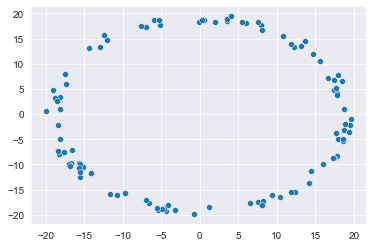

In [24]:


persistence = VietorisRipsPersistence(
    metric="euclidean", homology_dimensions=[0, 1, 2], n_jobs=1
)
display(sns.scatterplot(xs, ys))
display(persistence.fit_transform_plot(X))

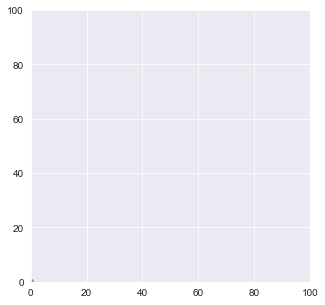

In [25]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def updata(frame_number):
    current_index = frame_number % 3
    a = [[10,20,30],[40,50,60],[70,80,90]]
    Points['xy'][:,0] = np.asarray(a[current_index])
    Points['xy'][:,1] = np.asarray(a[current_index])
    Pointsize = a[current_index]
    scat.set_offsets(Points['xy'])
    scat.set_sizes(Pointsize)
    #scat.set_offsets(Pointsize)
    #scat.set_offsets(Points['xy'],Pointsize)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title("For Dataset %d" % current_index)


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
Points = np.zeros(3,dtype=[('xy',float,2)])
Pointsize = [10] * 3
scat = ax.scatter(Points['xy'][:,0],Points['xy'][:,1],alpha=0.3,edgecolors='none')
ax.set_xlim(0,100)
ax.set_ylim(0,100)
animation = FuncAnimation(fig,updata,frames=50,interval=600)
plt.show()